# EXPLORATORY DATA ANALYSIS
Instructor: Allen Downey (Ollin College)

## Read, clean and validate

### DataFrames and Series

EDA: Use data, answer questions and drive decision making
- Find appropriate data, or collect it
- Read data in your development environment
- Clean and validate

In [ ]:
#Reading data
import pandas as pd #read several formats
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg') #data is the national survey of family frowth
type(nsfg) #result is a dataframe - primaty data structure that pandas uses to store data 

In [ ]:
nsfg.head() #first 5 rows. one row for each women
nsfg.shape #number of rows and columns 9358 rows and 10 columns
nsfg.columns #index type (pandas data structure with strings of all columns)

In [ ]:
#Each column is a Series
pounds = nsfg['birthwgt_lb1']
type(pounds) #result is a series - another pandas structure
pounds.head() #first 4 values of the series. float 64 is 64 bit float point numbers 

### Clean and Validate

Check for erros and prepare it for analyses

In [ ]:
#Selecting columns
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

In [ ]:
#Validate data interpretation
pounds.value_counts().sort_index() #values that appears and how many times. sort index to have lightest first and heavier last

Usually, we have to incurr to the code book, so we can be sure that we understand the data correctly

In [ ]:
#Describe
pounds.describe() #computes summary statistics

In [ ]:
#Replace
pounds = pounds.replace([98, 99], np.nan) #replace in a new series
pounds.mean()#consistency check. very low now

ounces.replace([98, 99], np.nan, inplace=True) #modifies the existing series inplace, without making a copy

In [ ]:
#Arithmetic with Series
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

### Filter and visualize

In [ ]:
#Histogram
import matplotlib.pyplot as plt
plt.hist(birth_weight.dropna(), bins=30) #does not work with na, so must drop those values that are not valid
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

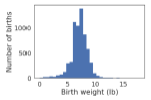

In [ ]:
#Boolean Series
preterm = nsfg['prglngth'] < 37 #each element will be a value of True or False
preterm.head()

preterm.sum() #True as one and False as 0
preterm.mean() #percentage of the trues (premterm)

In [ ]:
#Filtering
preterm_weight = birth_weight[preterm]
preterm_weight.mean() #provides average of preterm

full_term_weight = birth_weight[~preterm]
full_term_weight.mean() #provides average of normal babies

Filtering

Other logical operators:
- & for AND (both must be true)
- | for OR (either or both can be true)

Example:
- birth_weight[A & B] # both true
- birth_weight[A | B] # either or both true

Before answering the question, have in mind that the NSFG is not a representative sample of the US population. There are overssample of some groups. It is possible to correct it with:
- resample_rows_weighted()

In [ ]:
#FULL EXAMPLE

# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg["nbrnaliv"] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

## Distributions

### Probability mass functions

In [ ]:
#Read the data
gss = pd.read_hdf('gss.hdf5', 'gss') #annual sample of US population
gss.head()

#Distribution of Year of education
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

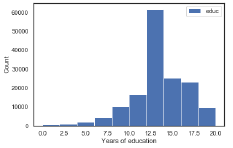

In [ ]:
#PMF - contains each value and how often each one appears
pmf_educ = Pmf(educ, normalize=False)
pmf_educ.head() #provides a table with head values and count (o to 4)
pmf_educ[12] #provides the amount of people with 12 years of education

# In percentage
pmf_educ = Pmf(educ, normalize=True)
pmf_educ.head()
pmf_educ[12]

In [ ]:
# PMF bar chart - SHOWS UNIQUE VALUES, IN CONTRAST WITH HISTOGRAM
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

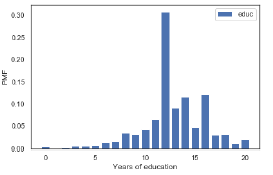

### Cumulative distribution functions 

From PMF to CDF
- If you draw a random element from a distribution
- PMF (Probability Mass Function) is the probability that you get exactly x
- CDF (Cumulative DIstribution Function) is the probability that you get a value <=x
- for a given value of x

In [ ]:
#CDF graph
cdf = Cdf(gss['age']) #creates an object
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

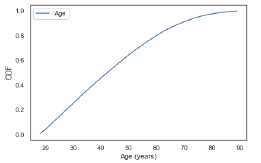

In [ ]:
#Evaluating the CDF (it can be used as a function)
q = 51
p = cdf(q) #corresponding cumulative probability
print(p) #returns 0.66

In [ ]:
#Evaluating the inverse CDF - calculating the IQR
p = 0.25
q = cdf.inverse(p) #we can see the 25% the corresponding age
print(q) #returns 30

p = 0.75
q = cdf.inverse(p)
print(q) #returns 57

### Comparing distributions

In [ ]:
#Multiple PMFs

#creates boolean and obtain age
male = gss['sex'] == 1 #boolean to find male
age = gss['age']

#obtain different datasets
male_age = age[male]
female_age = age[~male]

#plot the graph PMF
Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

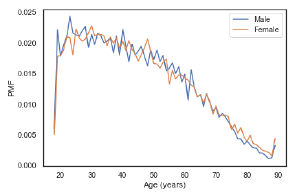

In [ ]:
#Multiple CDFs - smoother than PMF
Cdf(male_age).plot(label='Male')
Cdf(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

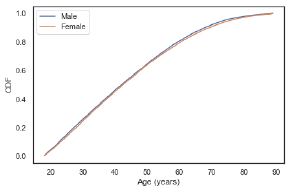

In [ ]:
#Income distribution
income = gss['realinc']
pre95 = gss['year'] < 1995 #boolean (midpoint of the curve)

#plot the graph
Pmf(income[pre95]).plot(label='Before 1995')
Pmf(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()# too noisy

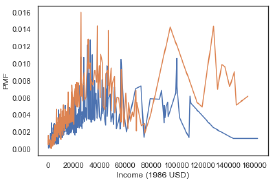

In [ ]:
#Income CDFs
Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995') #shift to the right

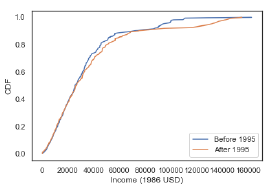

In [ ]:
#FULL EXAMPLE - Part 1: subsetting
# Select educ
educ = gss['educ']
# Bachelor's degree
bach = (educ >= 16)
# Associate degree
assc = (educ >= 14) & (educ < 16)
# High school (12 or fewer years of education)
high = educ <= 12
print(high.mean())

#FULL EXAMPLE - Part 2: plotting the CDF

income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

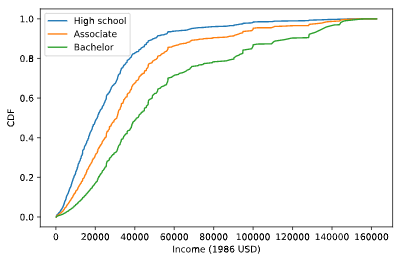

### Modeling distributions

In [ ]:
#The normal distribution
sample = np.random.normal(size=1000) #1 thousand random values from a normal distribution
Cdf(sample).plot()

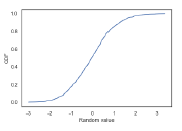

In [ ]:
#The normal CDF
from scipy.stats import norm #represents the normal distribution

xs = np.linspace(-3, 3) #array of equally space points
ys = norm(0, 1).cdf(xs) #normal distribution with mean 0 and std dev 1. cdf helps to evaluate the curve

plt.plot(xs, ys, color='gray')
Cdf(sample).plot()

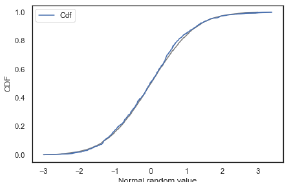

In [ ]:
#The bell curve
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)

plt.plot(xs, ys, color='gray') #when comparing to the pdf of the sample, it does not work well. flat line across the bottom

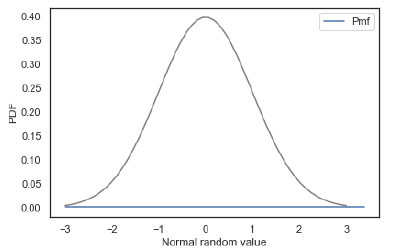

In [ ]:
#KDE plot
import seaborn as sns
sns.kdeplot(sample) #takes the sample, estimates the sns and plots it

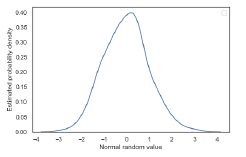

In [ ]:
#KDE and PDF
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

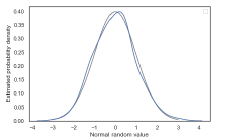

Summarizing:
- CDFs for exploration (less well known)
- PMF if there are a small number of unique values
- KDE if the are a lot of values

In [ ]:
#FULL EXAMPLE

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

#FULL EXAMPLE 2
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

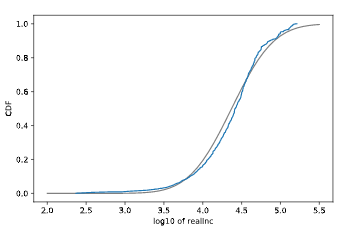

In [ ]:
#FULL EXAMPLE 3

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

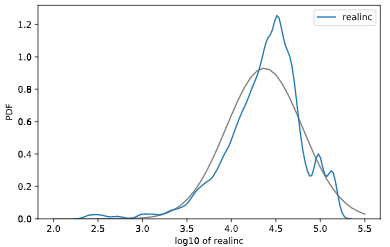

## Relationships

### Exploring relationships

In [ ]:
#import and subset
brfss = pd.read_hdf('brfss.hdf5', 'brfss') #data from BRFSS (behavioral risk factor surveillance system), from center for disease control and prevention
height = brfss['HTM4']
weight = brfss['WTKG3']

#Scatter plot - faster with the o parameter
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show() #hard to interpret - overplotted

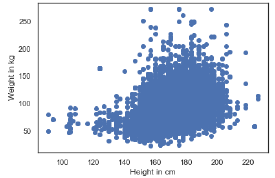

In [ ]:
#Transparency
plt.plot(height, weight, 'o', alpha=0.02)
plt.show() #still overplotted

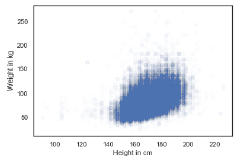

In [ ]:
#Marker size
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.show() #less satured. discrete columns (inches and converted to centimeters)

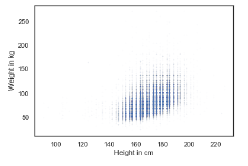

In [ ]:
#Jittering
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.show() #add random noise (jittering)

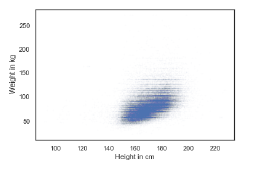

In [ ]:
#More jittering
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.show()

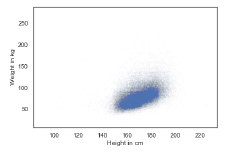

In [ ]:
#Zoom
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.show() #reliable picture of their relationship. takes effort to make efficient scatter plot

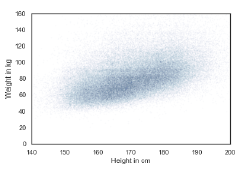

### Visualizing relationships

In [ ]:
#Weight and age - do people gets heavier when older?
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
weight = brfss['WTKG3']
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)
plt.show()

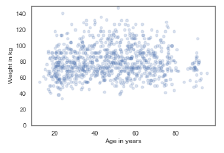

In [ ]:
#More data
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight, 'o', markersize=1, alpha=0.2) #reduced marked size and changed jittered
plt.show()

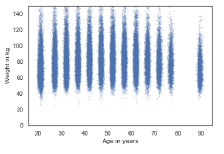

In [ ]:
#Violin plot - like the previous one, but uses KDE as well. comes from seaborn
data = brfss.dropna(subset=['AGE', 'WTKG3']) #removes nan from both datasets - both or just one? Don't know
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None) #inner simplifies the plot
plt.show()

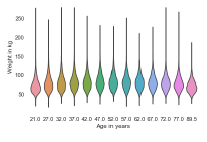

In [ ]:
#Box plot
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10) #whis turn of a feature we don't need
plt.show()

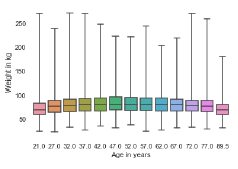

In [ ]:
#Log scale
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log') #change the scale
plt.show()

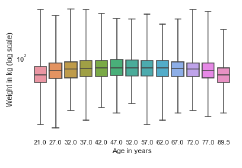

### Correlation 

In [ ]:
#Correlation coefficient - quantifies the strenght of the relationship between variables
columns = ['HTM4', 'WTKG3', 'AGE'] #select three columns of the dataset
subset = brfss[columns]

#obtain correlation - a matrix
subset.corr() #works pretty well for linear relationships, not the opposite

In [ ]:
#demonstrate with fake data
xs = np.linspace(-1, 1) #equally points from negative 1 to 1
ys = xs**2 #y is x squared, plus a random noise
ys += normal(0, 0.05, len(xs))

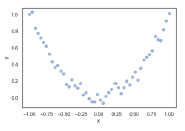

In [ ]:
#plotting the relationship, it is close to 0
np.corrcoef(xs, ys)

To solve this problem, we must have in mind that, when close to 1, there is a strong relationship, but when it is close to 0, we can not conclude there is no relationship, but there is a strong NON linear relationship

Correlation do not tell us about slope. It means that we can use one to predict the other

### Simple regression

Two fake data created. The one has more correlation, but the second is more important (y axix). We want to understand the slope

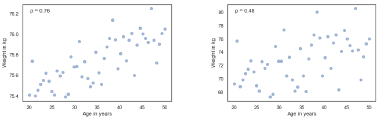

In [ ]:
#Strength of effect
from scipy.stats import linregress

# Hypothetical 1 
res = linregress(xs, ys) #provides 5 statistical values

#slope, intercept, rvalue (correlation), pvalue, std err

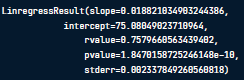

In [ ]:
# Hypothetical 2
res = linregress(xs, ys)

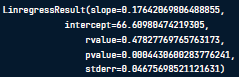

In [ ]:
#Regression lines - combine the line that best fit
fx = np.array([xs.min(), xs.max()]) #min and max of observed axis
fy = res.intercept + res.slope * fx #multiply y the slope and the intercept
plt.plot(fx, fy, '-') #plot the line. Pay attention to the vertical scales

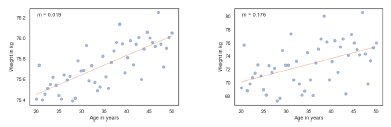

In [ ]:
#Regression line - different dataset (weight vs height)
subset = brfss.dropna(subset=['WTKG3', 'HTM4']) #remove missing data
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)

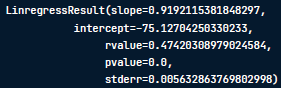

In [ ]:
#plot the graph
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
#Linear relationships - only measures the strength of a linear relationship

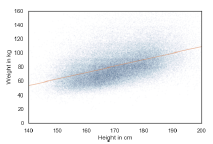

In [ ]:
#Nonlinear relationships
subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys) #straight line can not capture the relationship

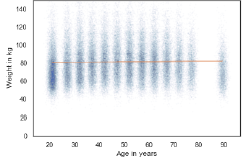

In [ ]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope*fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

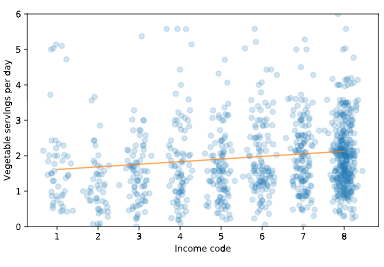

## Multivariate Thinking

### Limits of simple regression

We could plot the axis the other way around. They might have different results and interpretations. Therefore, they are not symmetric

Correlation/regression does not mean causation

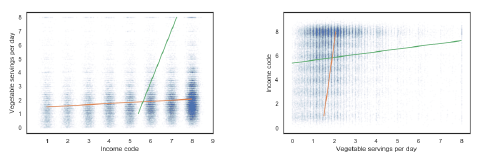

In [ ]:
#Multiple regression
import statsmodels.formula.api as smf #other library, different from scipy

results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit() #ordinary least square is another nbame for regression. \
#we sant to have income in function of vegetable consumption.fit() gives the results
results.params #same results as before

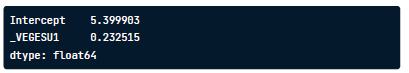

In [ ]:
#FULL EXAMPLE - plot with both libraries

from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

### Multiple regression

In [ ]:
#Income and education
gss = pd.read_hdf('gss.hdf5', 'gss')
results = smf.ols('realinc ~ educ', data=gss).fit() #predict realinc from educ
results.params #results. additionally year of education provides 3586 income

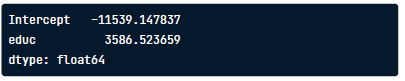

In [ ]:
#Adding age
results = smf.ols('realinc ~ educ + age', data=gss).fit() #additive assumption
results.params

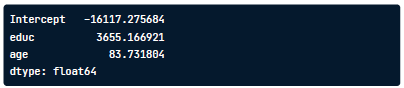

In [ ]:
#Income and age - understand whe previous output
grouped = gss.groupby('age') #divide the dataframe into age groups - pandas feature

In [ ]:
mean_income_by_age = grouped['realinc'].mean() #group by mean

#plot the mean grouped by age
plt.plot(mean_income_by_age, 'o', alpha=0.5) 
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

#relationship is not linear, that is why the slope is so small

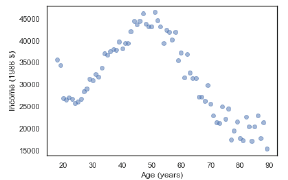

In [ ]:
#Adding a quadratic term
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

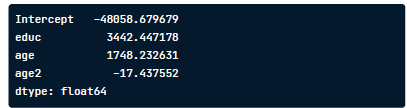

### Visualizing regression results

In [ ]:
#Modeling income and age  - same from previous exercise
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
results = model.fit()
results.params
#Sometimes, we must look at its predictions, instead of its parameters

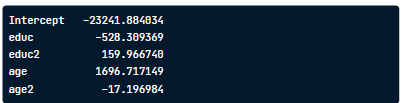

In [ ]:
#Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

df['educ'] = 12 #the most common value
df['educ2'] = df['educ']**2

pred12 = results.predict(df) # one prediction for each row

In [ ]:
#Plotting predictions
plt.plot(df['age'], pred12, label='High school') # x = age; y = predicted income
plt.plot(mean_income_by_age, 'o', alpha=0.5)

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

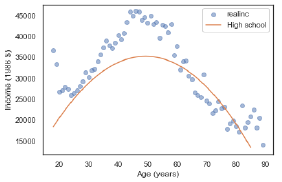

In [ ]:
#For Different Levels of education
#Associate
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')

#Bachelor
df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor'

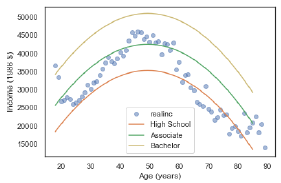

In [ ]:
#FULL EXAMPLE 1

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

#FULL EXAMPLE 2

# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, "o", alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

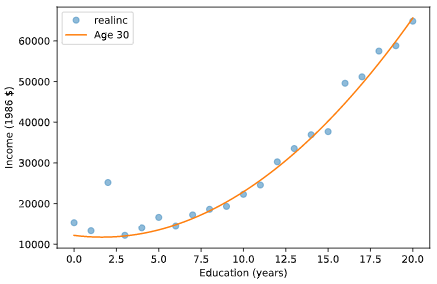

### Logistic regression

Categorical variables
- Numerical variables: income, age, years of education.
- Categorical variables: sex, race.

In [ ]:
#Sex and income
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params #income for women is 4156 dollars less than for man

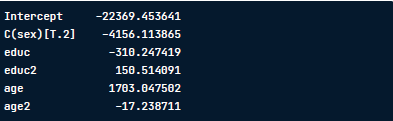

In [ ]:
#Boolean variable
gss['gunlaw'].value_counts() # 1 yes and 0 no for adoption to different a gun law

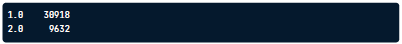

In [ ]:
#Recode the variable so 1 means yeas and 0 means no
gss['gunlaw'].replace([2], [0], inplace=True)
gss['gunlaw'].value_counts()

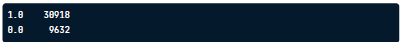

In [ ]:
#Logistic regression
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit() #logit function, instead of ols
results.params #form of log odds. positive values are associated with more likely outcome
#negative values make the outcome less likely. women more likely to support the new type of gun control

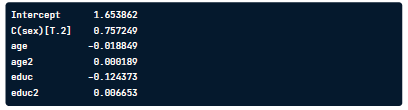

In [ ]:
#Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12

df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

#predictions for men
df['sex'] = 1
pred1 = results.predict(df)

#predictions for women
df['sex'] = 2
pred2 = results.predict(df)

In [ ]:
#Visualizing results
#Group by age and obtain the mean for each group 
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()

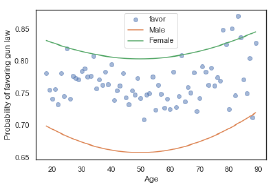

In [ ]:
#FULL EXAMPLE

# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped["grass"].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred1, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

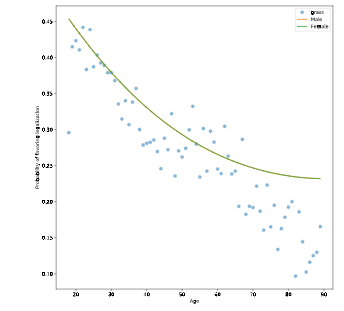

### Next steps

Exploratory Data Analysis
- Import, clean, and validate
    - It is boring, but if not done, will come back to haunt you
    - Saves people from expansive errors
    - 99 pound babies. validate it
- Visualize distributions (CDF, PMF, and KDE and appropriate summary satistics)
  - Use CDFs for exploration. (best way to explore it)
  - Use PMFs if there are a small number of unique values.
  - Use KDE if there are a lot of values.
    - Scatter plots and other visualizations.
  - Boxplot, violinplots etc 
- Explore relationships between variables
  - Quantify it with correlation and simple regression
  - Be careful for non linear relationship
- Explore multivariate relationships
  - Multiple Regression
  - Logistic Regression

